## Heart Model - Classification modelling

### Importing libraries

In [98]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Downloading Dataset

In [100]:
df = pd.read_csv('Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [101]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [171]:
df.shape

(1319, 9)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [103]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [104]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

There are no null values

In [106]:
df.duplicated().sum()

0

In [ ]:
No duplicates

In [107]:
df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [109]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

## Data visualizations

In [111]:
# Set style

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

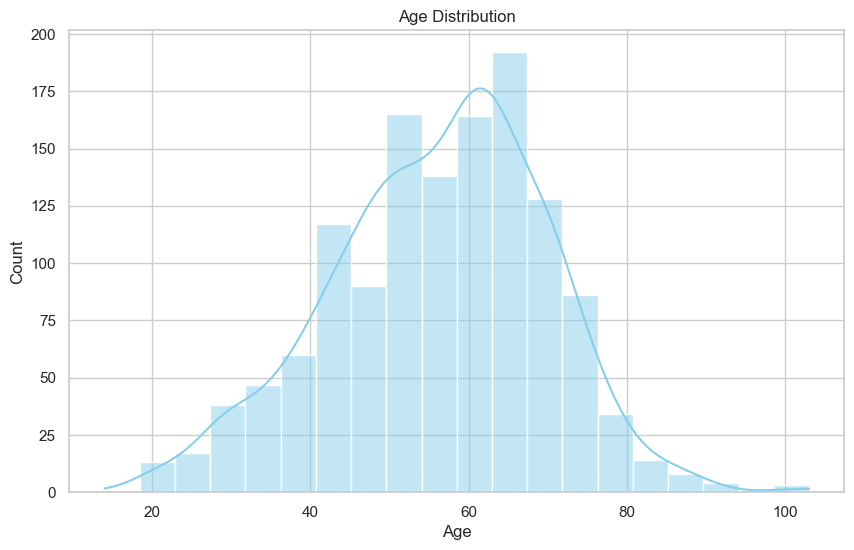

In [112]:
# 1. Distribution of Age

sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

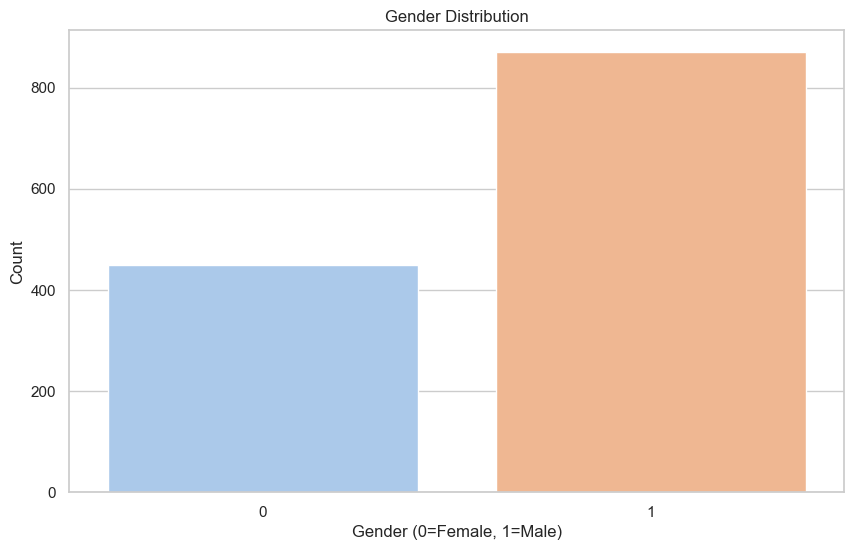

In [113]:
# 2. Gender distribution

sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()

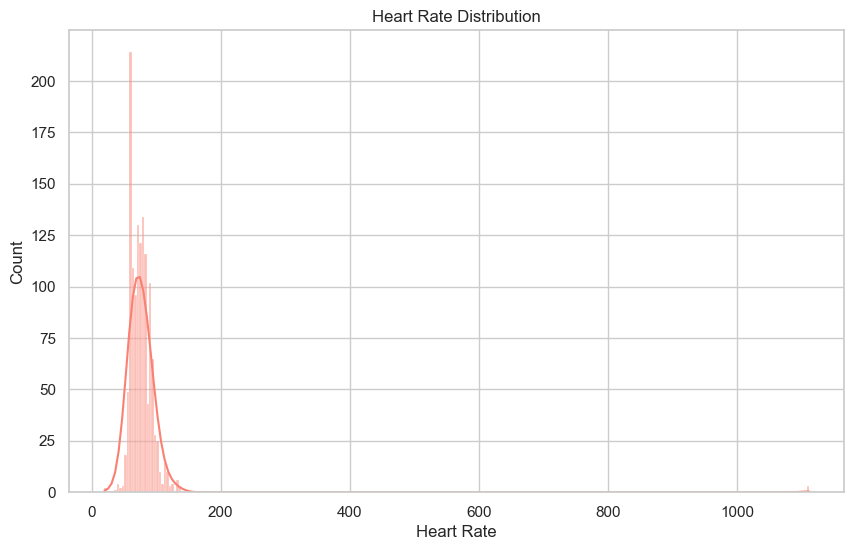

In [114]:
# 3. Heart rate distribution

sns.histplot(df['Heart rate'], kde=True, color='salmon')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

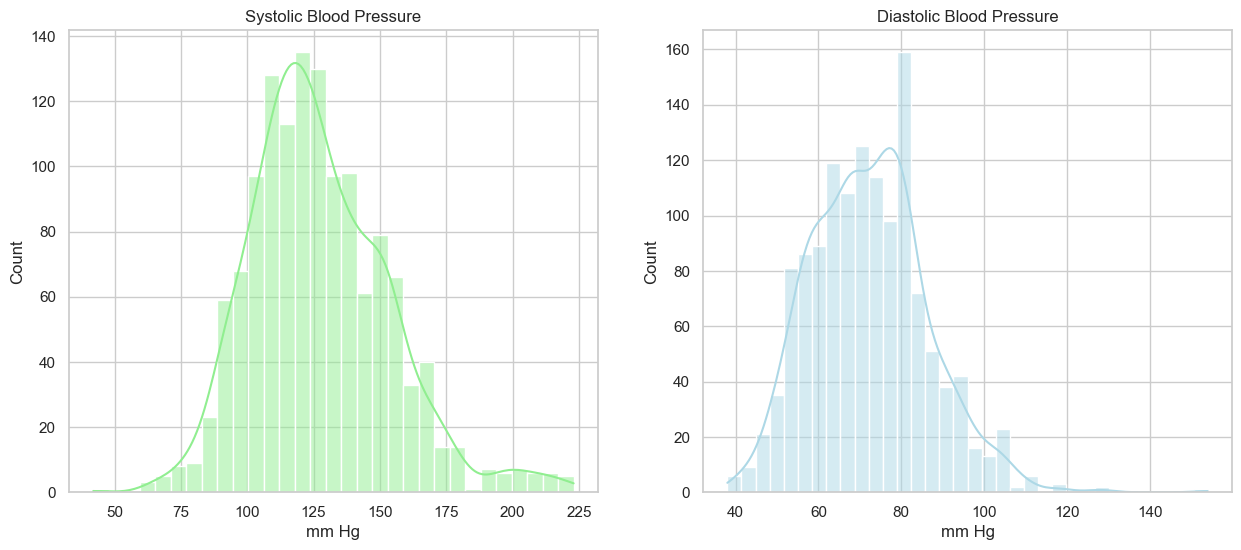

In [115]:
# 4. Systolic & Diastolic blood pressure

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Systolic blood pressure'], kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Systolic Blood Pressure')
ax[0].set_xlabel('mm Hg')
sns.histplot(df['Diastolic blood pressure'], kde=True, ax=ax[1], color='lightblue')
ax[1].set_title('Diastolic Blood Pressure')
ax[1].set_xlabel('mm Hg')
plt.show()

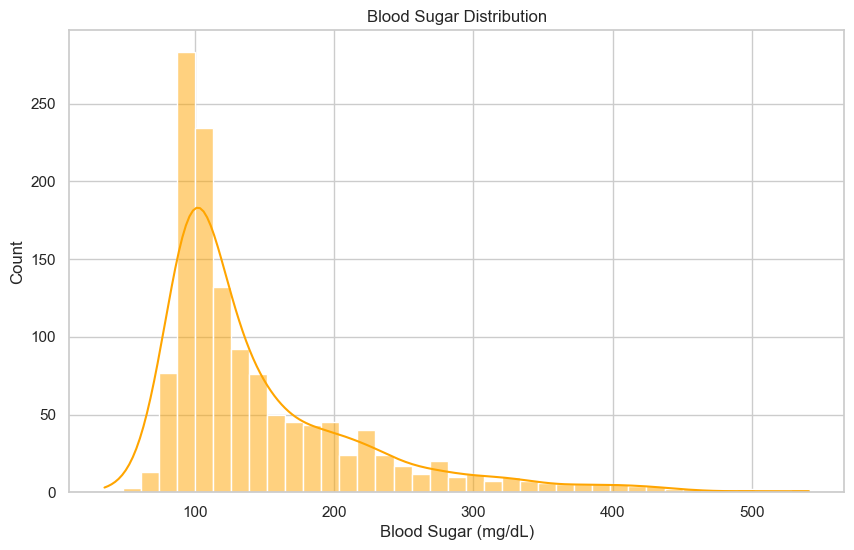

In [116]:
# 5. Blood Sugar

sns.histplot(df['Blood sugar'], kde=True, color='orange')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar (mg/dL)')
plt.ylabel('Count')
plt.show()

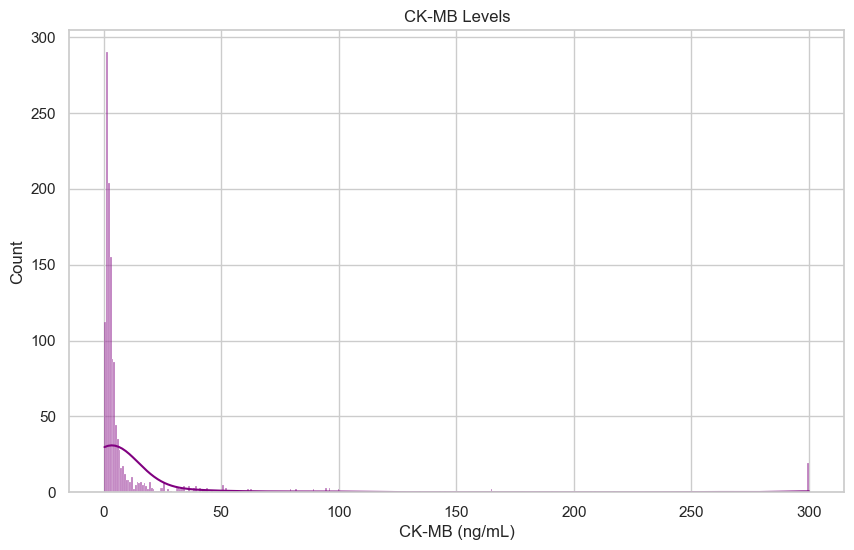

In [117]:
# 6. CK-MB Levels

sns.histplot(df['CK-MB'], kde=True, color='purple')
plt.title('CK-MB Levels')
plt.xlabel('CK-MB (ng/mL)')
plt.ylabel('Count')
plt.show()

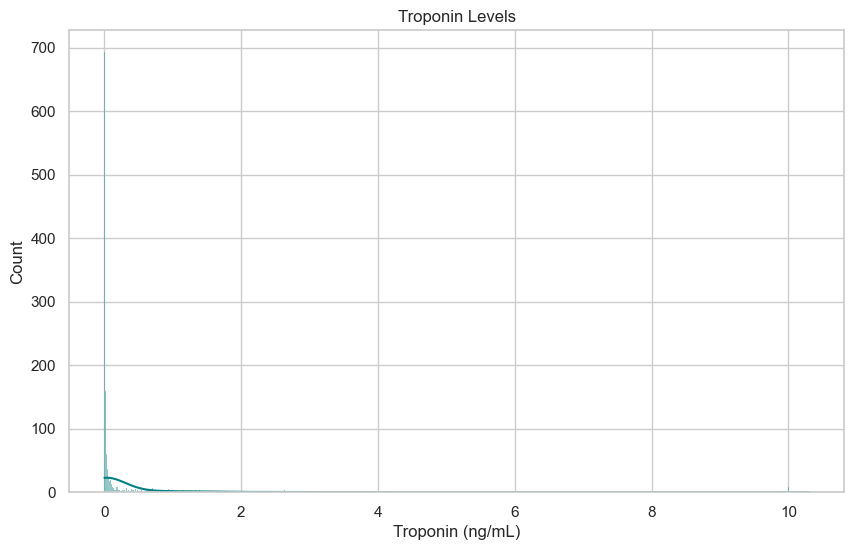

In [118]:
# 7. Troponin Levels

sns.histplot(df['Troponin'], kde=True, color='teal')
plt.title('Troponin Levels')
plt.xlabel('Troponin (ng/mL)')
plt.ylabel('Count')
plt.show()

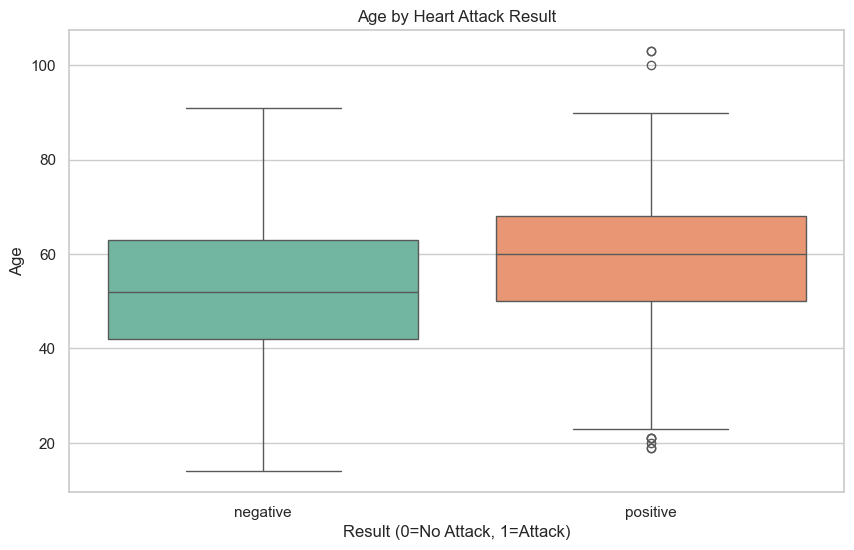

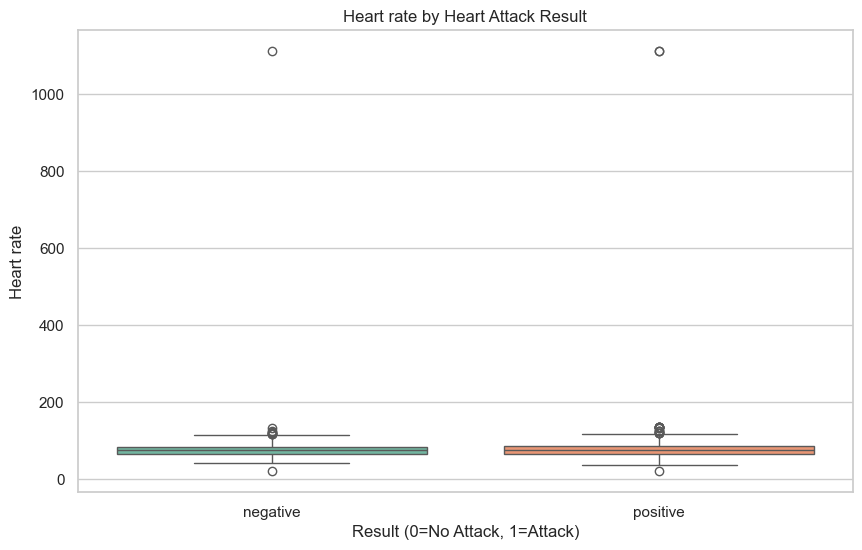

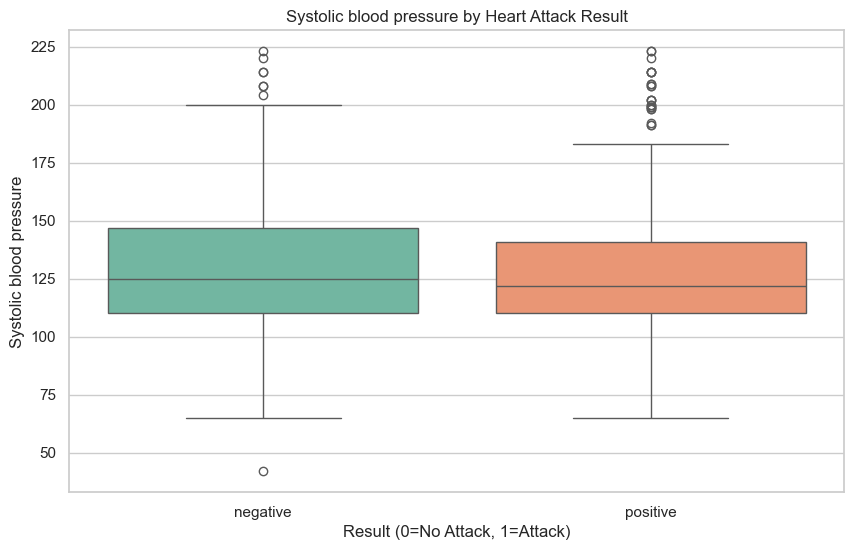

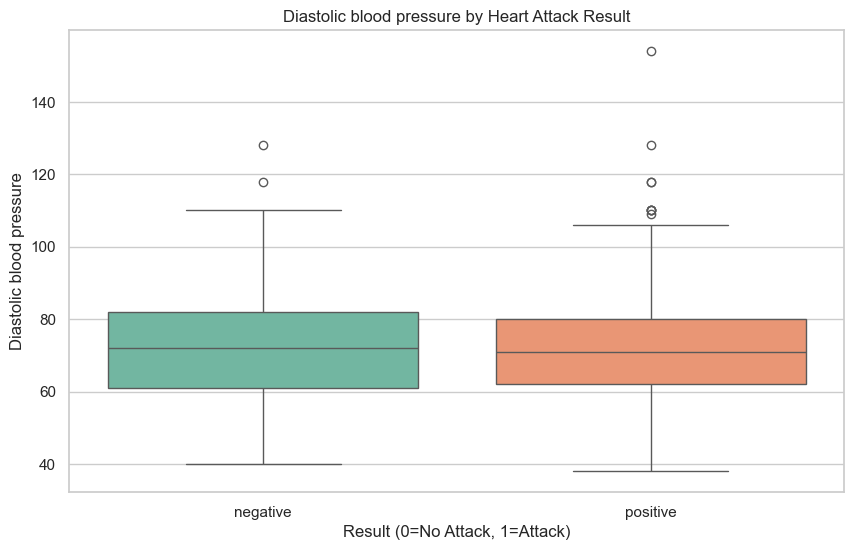

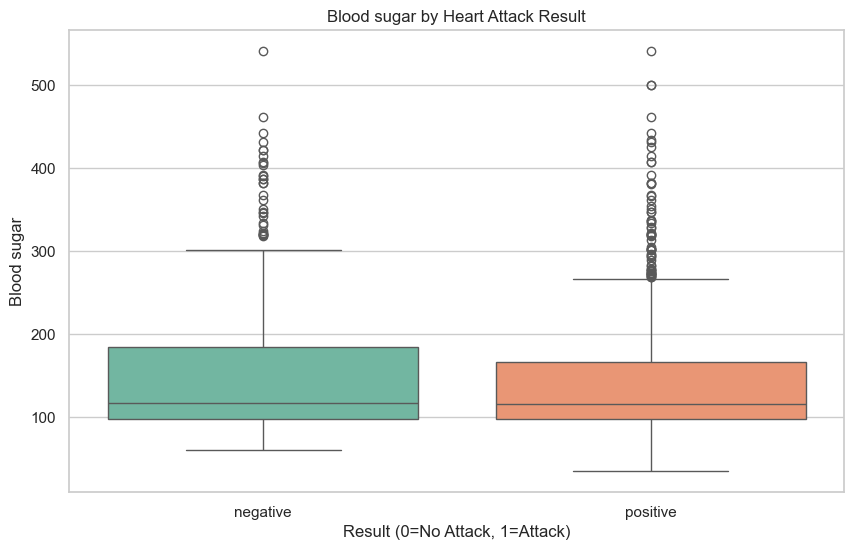

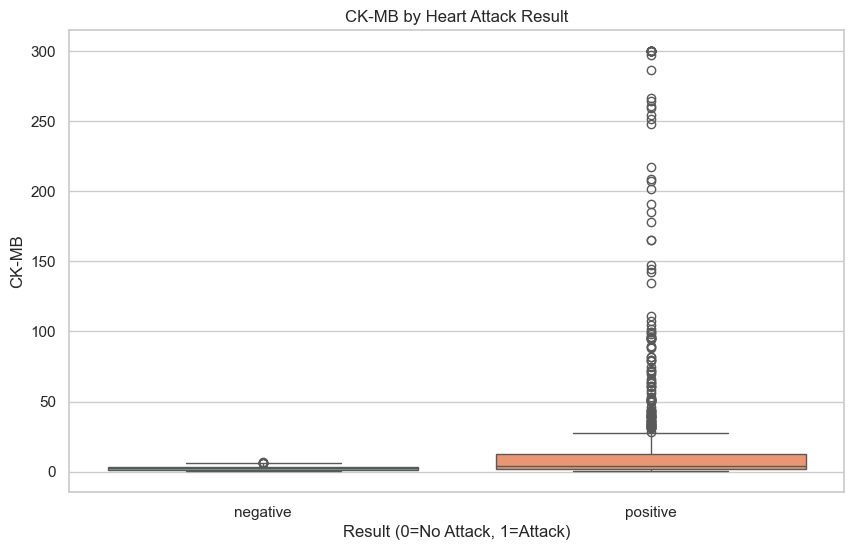

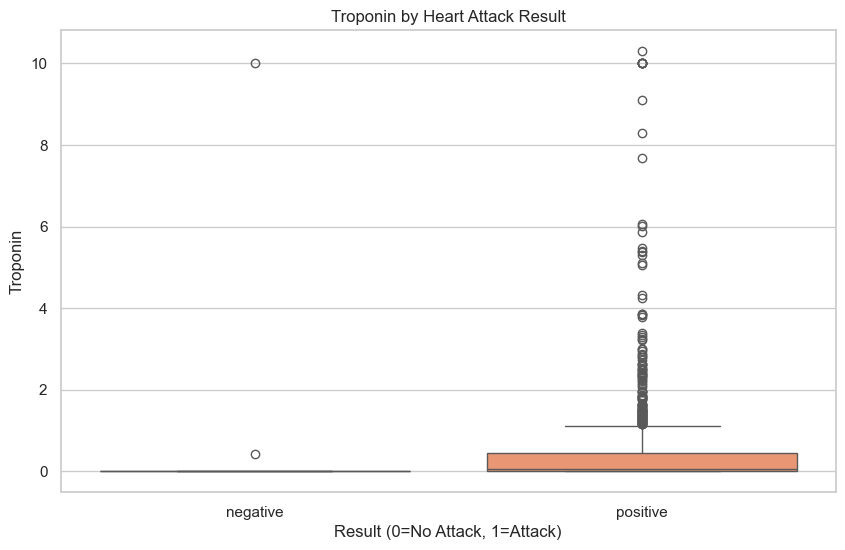

In [119]:
# 8. Boxplots for comparing features across Result

features = ['Age', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

for col in features:
    sns.boxplot(x='Result', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Heart Attack Result')
    plt.xlabel('Result (0=No Attack, 1=Attack)')
    plt.ylabel(col)
    plt.show()

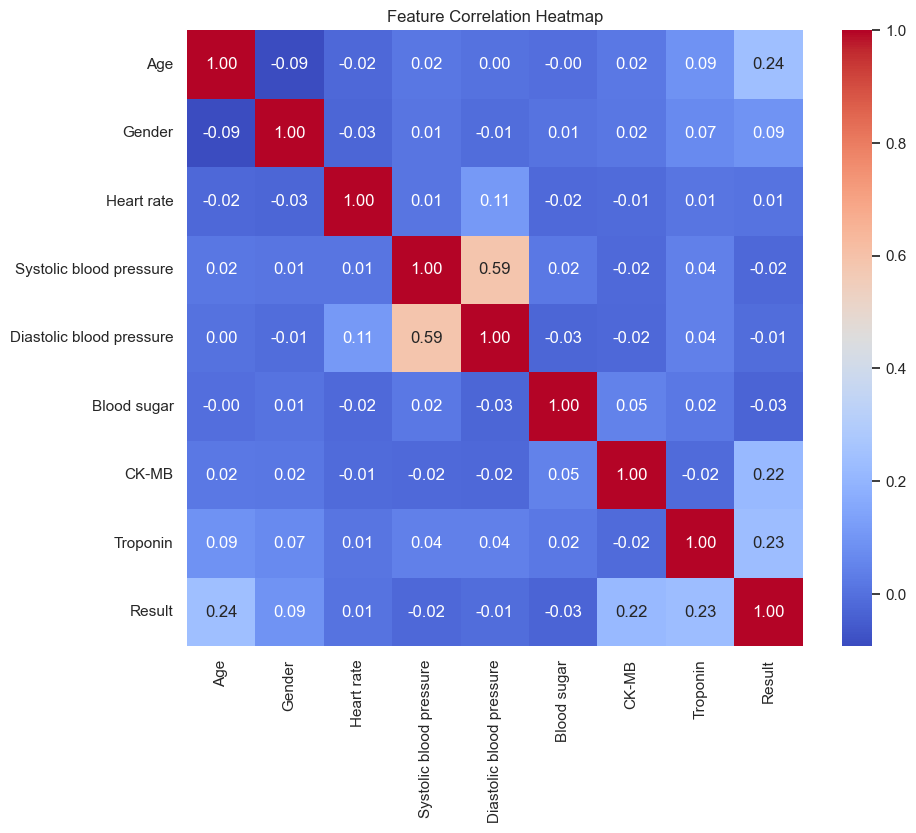

In [120]:
# Convert 'Result' column to numeric if it's in string form like 'positive'/'negative'
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

# Convert 'Gender' if it's also in string form
if df['Gender'].dtype == object:
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Drop any non-numeric columns just to be safe
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

## Predictive modeling

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [180]:
# Label Encoding for categorical columns
label_enc = LabelEncoder()
if df['Gender'].dtype == object:
    df['Gender'] = label_enc.fit_transform(df['Gender'])

if df['Result'].dtype == object:
    df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

# Split features and label
X = df.drop('Result', axis=1)
y = df['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
print("Model Accuracies:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: {acc:.2f}%")

Model Accuracies:

Logistic Regression: 79.55%
Decision Tree: 98.11%
Random Forest: 97.73%
Support Vector Machine: 69.32%
Naive Bayes: 78.79%
K-Nearest Neighbors: 64.39%


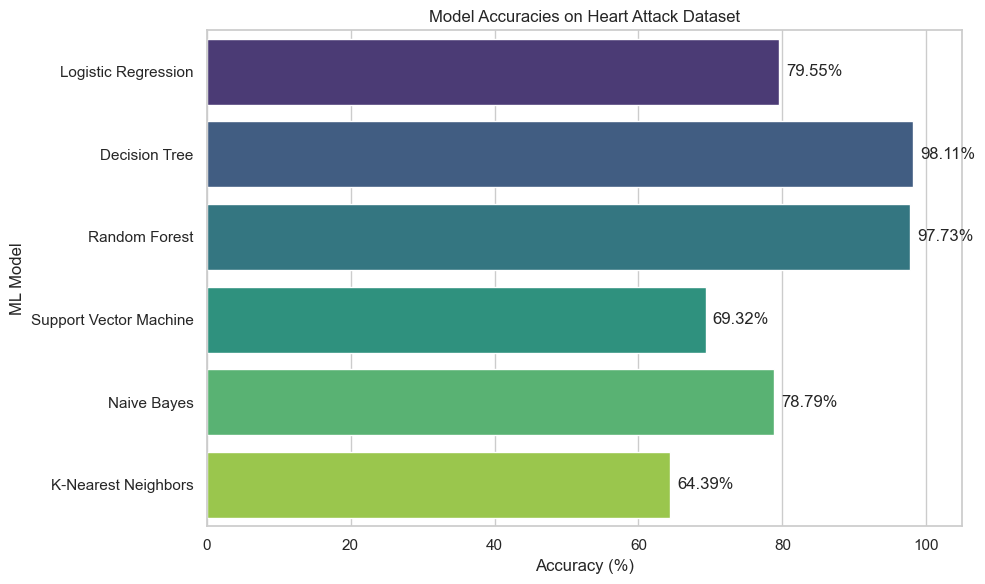

In [125]:
# Accuracy results
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest',
               'Support Vector Machine', 'Naive Bayes', 'K-Nearest Neighbors']
accuracies = [79.55, 98.11, 97.73, 69.32, 78.79, 64.39]

# Create DataFrame for plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (%)': accuracies
})

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')

# Add accuracy labels on bars
for index, value in enumerate(accuracies):
    plt.text(value + 1, index, f"{value:.2f}%", va='center')

plt.title('Model Accuracies on Heart Attack Dataset')
plt.xlim(0, 105)
plt.xlabel('Accuracy (%)')
plt.ylabel('ML Model')
plt.tight_layout()
plt.show()